# 2D conductive heat transport application: temperature diffusion in the near-field of an underground coal gasification reactor

Today, we study the **temperature diffusion in the near-field of an underground coal gasification reactor** in a coal seam of 20 m thickness. The simplified model used for this purpose has an extent of 20 m x 20 m (Fig. 1) and benefits from the reactor symmetry, reducing the overall model size by considering only a half domain, and thus the required computational time. 

<img src="07_Heat_flow_2D_application-Fig1.png" style="width:500px;"/> 
**Figure 1**: Geometry of a model of an idealised underground coal gasification reactor (quadrant with red dot) in a 20-m thick coal seam (not to scale).

Today's and next week's main **learning objectives** are:
-  Theory and application of the two main types of model boundary conditions
-  Application of convergence criteria for 2D temperature diffusion for automatic time step size determination
-  Implementation of time-dependent inner and outer boundary conditions

**The basis for the present model is our 2D conductive heat transport implementation completed in the last week, which we have *validated* using the analytical solution for 2D heat diffusion (see cells below).**


## Model parameters
-  Thermal diffusivity ($m^2/s$): $\alpha = K / (\rho \cdot c_p )$ with:
-  Heat conductivity: $K =  0.5\,W/m/K$
-  Specific heat capacity: $c_p = 1{,}130\,J/kg/K$
-  Density: $\rho = 1{,}281\,kg/m^3$
-  Initial temperature: $T_\text{ini} = 20\,^\circ \text{C}$
-  Gasification temperature: $T_\text{UCG} = 1000\,^\circ \text{C}$

## Convergence criterion for 2D diffusion PDE
The convergence criterion is derived from the explicit FDM approximation of the 2D diffusion equation by isolation of the $T_{i,j}$ terms on the RHS of the equation (we have just done this exercise by hand). Our $\Delta t$ is thus per definition small enough to allow energy (heat) flux per time step to be limited to a distance of $<\Delta x$ and $<\Delta y$.    

$\Delta t \lt \frac{1}{2 \alpha \left(\frac{1}{\Delta x^2}+\frac{1}{\Delta y^2}\right)}$

If this criterion is not maintained, oscillations in the numerical solution will occur. As we already know, these are likely to compromise our modelling results.

## Main model boundary conditions
We will apply the following two boundary conditions in our models:
-  **Neumann boundary condition**: $-K \frac{\partial T}{\partial x} = q$ and/or $-K \frac{\partial T}{\partial y} = q$ (with $q$ as constant source or sink term). If $q = 0\, W/m^3$, we are dealing with the so-called Neumann no-flow boundary condition (no heat diffusion across the model boundary or 'closed model boundary')
-  **Dirichlet boundary condition**: $T = \text{const.}$ (primary variable(s) are maintained constant what equals an open boundary)

We further differentiate between:
-  **Outer** boundary conditions (at the model boundary or boundaries)
-  **Inner** boundary conditions (inside the model and not at its boundaries)

Further boundary condition types available, such as the periodic boundary conditions represent time-dependent implementations of Neumann or Dirichlet boundary condition types.


### Exercises
1. Please implement the model geometry including the initial temperature and the inner boundary condition (Dirichlet type in the reactor with the given gasification temperature) based on the solution of last week's exercise.  Then, visualise your results for the time $t = 0\,s$. <br>
*Hint: general form of equation of a circle $y = y_M \pm \sqrt{r^2 - (x - x_M)^2}$, with $x_M$ and $y_M$ as circle centre coordinates and $r$ as circle radius.* 
2. Please adapt the second matplotlib figure to plot the temperature profiles along the coordinates $x=0\,m$ and $y= 10\,m$. 
3. Revise your code to maintain a constant inner Dirichlet boundary condition during the entire simulation time (50 days gasification operation).
4. Integrate the aforementioned convergence criterion to automagically calculate the time step size and required number of time steps using the parameters $t$, $\Delta x$, $\Delta y$ and $\alpha$.
5. Please implement the Neumann boundary condition ($-K \frac{\partial T}{\partial x} = 0$) at the left model boundary to represent the model symmetry in a mathematically correct manner. Which boundary conditions are now valid at all the other model boundaries?
6. Please implement the following operational scenarios and compare the maximum temperature diffusion after 50, 60, 75, 100 and 150 days qualitatively:
    1.  50 days of gasification followed by 100 days of natural cooling
    2.  50 days of gasification followed by 30 days of forced cooling by water (vapour) injection at $100\,^\circ \text{C}$
    
#### Hint
Try the method `pcolormesh` instead of `contour` with `alpha=1` (transparency off) for plotting. 

28800 240


/home/tk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in sqrt


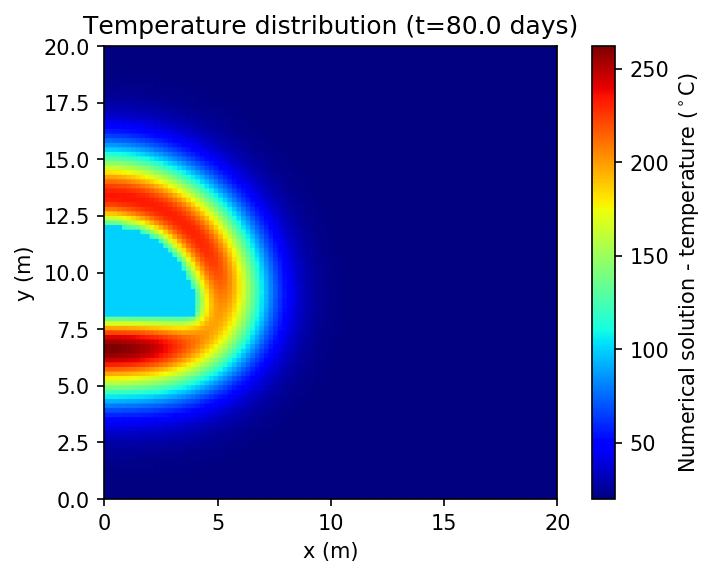

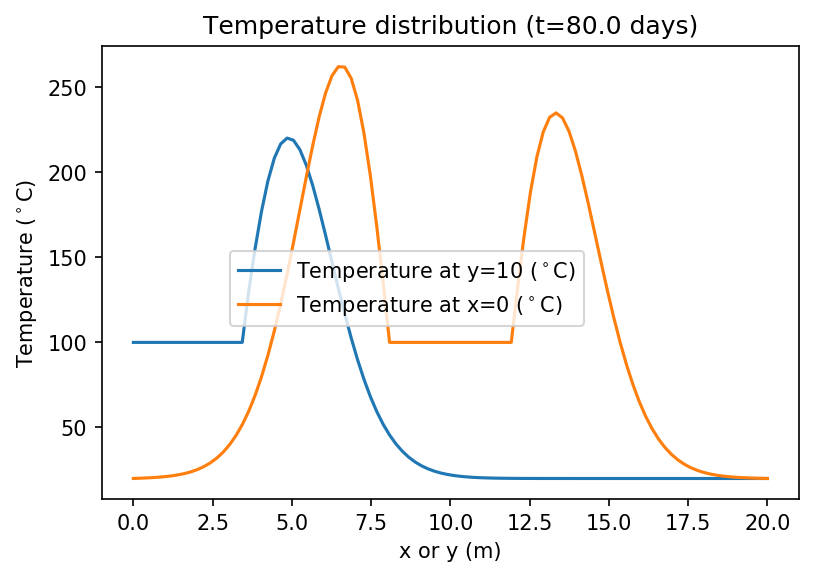

In [3]:
'''
    Application: 2D temperature diffusion in the vicinity of a gasification 
    reactor
    
    Parameters:
    ### PLEASE COMPLETE ###
'''

# load required libraries
import numpy
from matplotlib import pyplot, cm
%matplotlib inline


# model parametrisation
lx = ### PLEASE COMPLETE ###             # model length in x direction (m)
ly = ### PLEASE COMPLETE ###             # model length in y direction (m)
nx = ### PLEASE COMPLETE ###            # number of nodes in x direction (-)
ny = ### PLEASE COMPLETE ###            # number of nodes in y direction (-)
dx = lx / (nx - 1)  # node distance in x direction (m)
dy = ly / (ny - 1)  # node distance in y direction (m)
alpha = ### PLEASE COMPLETE ### # coal thermal diffusivity (m^2/s)
T_UCG = ### PLEASE COMPLETE ###        # gasification temperature (°C)
T_COOL = ### PLEASE COMPLETE ###        # temperature water injection (°C)
T_ini = ### PLEASE COMPLETE ###          # initial temperature (°C)

t = ### PLEASE COMPLETE ###        # simulation time (s)

dt = ### PLEASE COMPLETE ### # calculate integer dt via
                                        # convergence criterion
    
# adapt time step size to match desired simulation time
### PLEASE COMPLETE ###       
print('dt', dt, 'nt', nt) # print for control (can be commented out)

# initialise matrices required for our calculations
T = numpy.ones((nx,ny))*T_ini   # numpy matrix (array) wth nx x ny elements
                           # results for time step (n+1)
Tn = numpy.ones((nx,ny))   # results for time step (n)
B = numpy.zeros((nx,ny))   # boundary condition matrix

# set initial and boundary conditions by means of circle equation for t=0
for i in range(### PLEASE COMPLETE ###): # iterate over all i nodes [0,nx]
    for j in range(### PLEASE COMPLETE ###): # Iterate over all j nodes [0,ny]
        ### PLEASE COMPLETE ###

# FDM approximation of 2D PDE
for n in range(1,nt+1):  # iterate over nt time steps
    Tn = T.copy()        # copy T values from previous time step into Tn 
    for i in range(0, nx - 1): # iterate over i nodes 
        for j in range(1, ny - 1): # iterate over j nodes
            ### PLEASE COMPLETE ###
          
    
                
# plotting the results
x = numpy.linspace(0, lx, nx)
y = numpy.linspace(0, ly, ny)

# 2D plot
fig = pyplot.figure(dpi=150)
X, Y = numpy.meshgrid(x, y)
ax = fig.gca(aspect=1)
nux = ax.contourf(X, Y, numpy.transpose(T), cmap=cm.jet,
        linewidths=0.5, alpha=1, antialiased=True, linestyles='solid');
cbnux = fig.colorbar(nux);
cbnux.set_label('Numerical solution - temperature ($^\circ$C)')
pyplot.title('Temperature distribution (t='+str(n*dt/86400)+' days)');
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

# cross sections plot
xx = numpy.linspace(0,lx,nx)
fig2 = pyplot.figure(dpi=150)
pyplot.plot(xx,T[### PLEASE COMPLETE ###], label='Temperature at y=10 ($^\circ$C)');
pyplot.plot(xx,T[### PLEASE COMPLETE ###], label='Temperature at x=0 ($^\circ$C)');
pyplot.title('Temperature distribution (t='+str(nt*dt/86400)+' days)');
pyplot.xlabel('x or y (m)');
pyplot.ylabel('Temperature ($^\circ$C)');
fig2.legend(loc='center');